<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


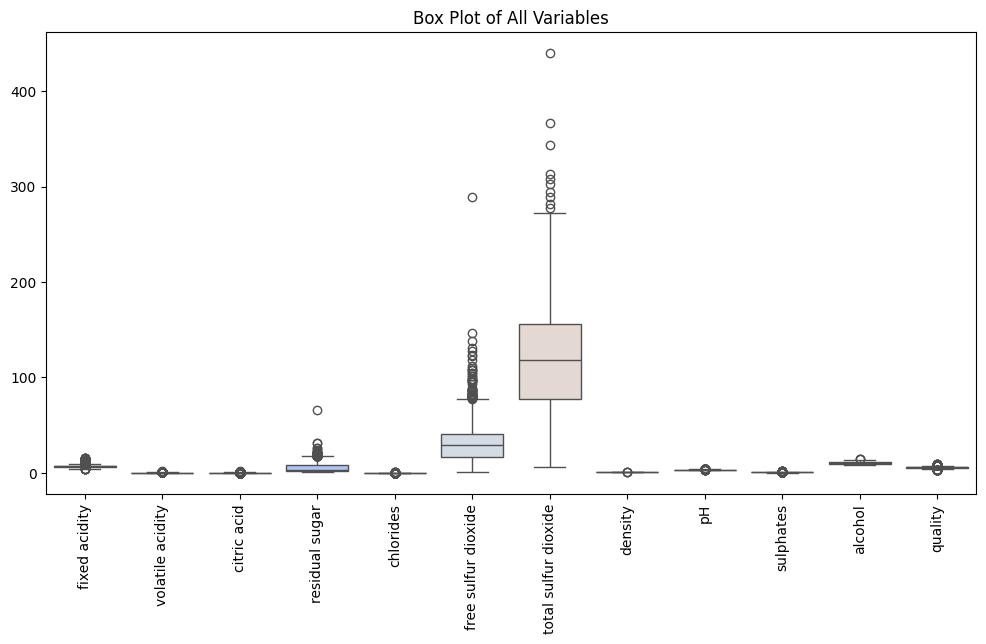

<ipython-input-14-07eb9f855568>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wine_type', data=data, palette="Set2")


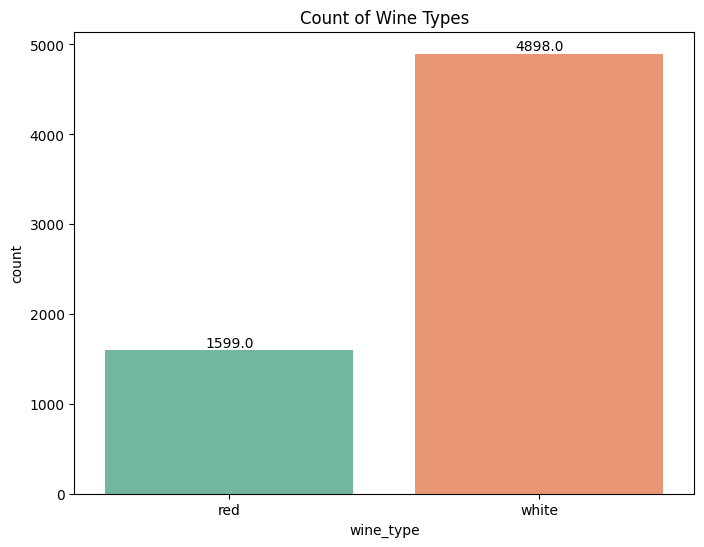

Missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64
Duplicate rows: 1177


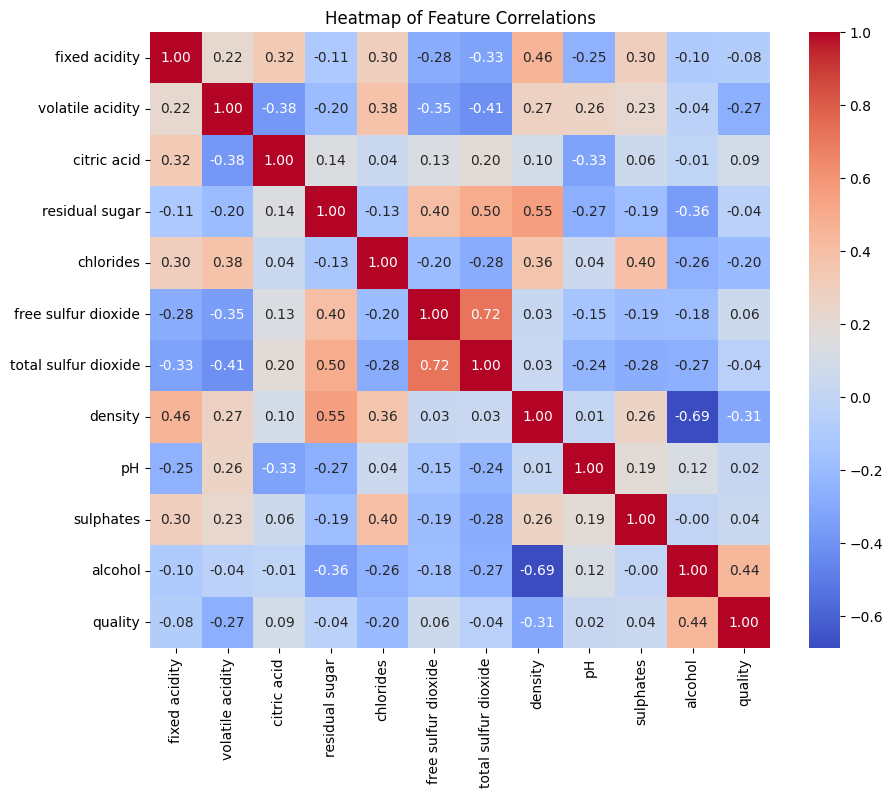

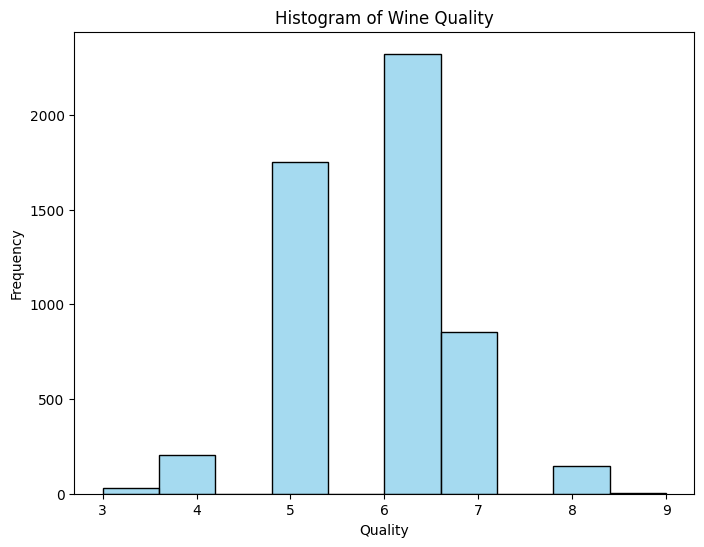

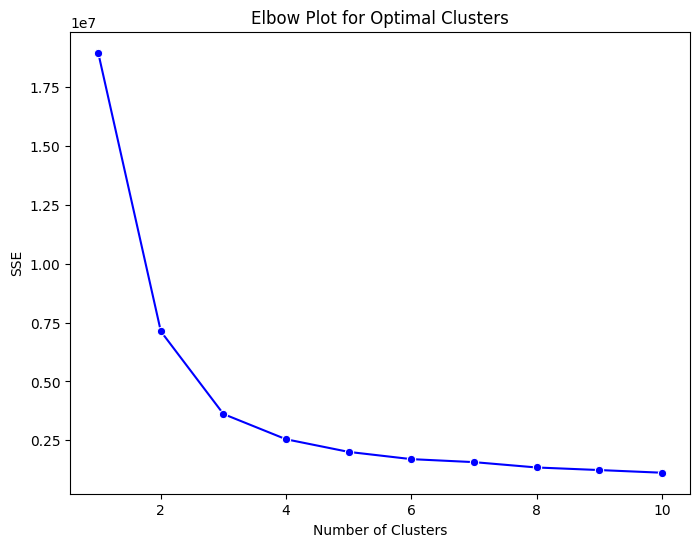

Silhouette Score: 0.5047000432227012


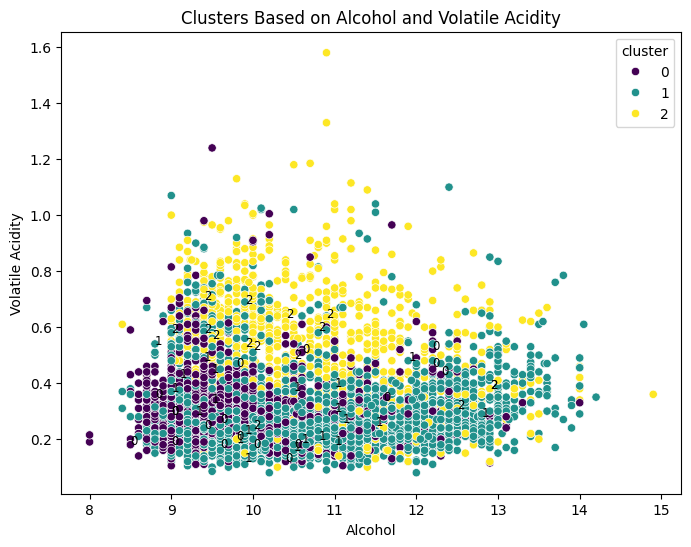

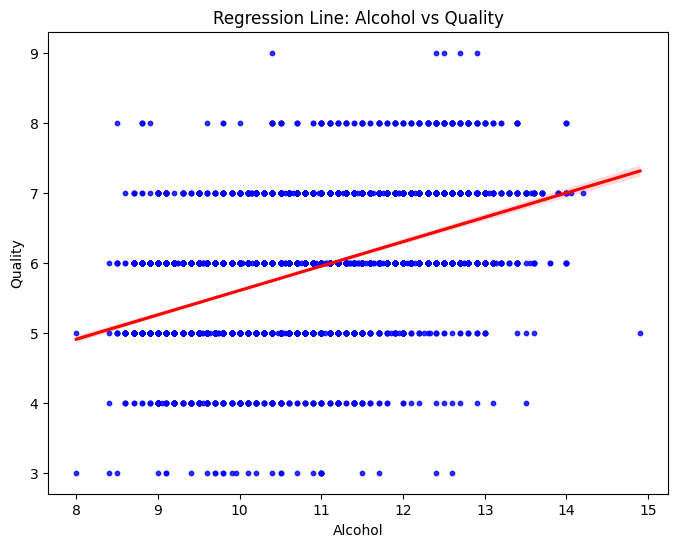

Mean Squared Error (Regression): 0.5382425572528093


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, mean_squared_error
from sklearn.model_selection import train_test_split


def load_and_explore_data(red_file, white_file):
    """
    Load red and white wine datasets, combine them, and perform initial exploration.
    Includes counting missing values, duplicates, and plotting box plots and count plots.
    """
    red_wine = pd.read_csv(red_file, sep=';')
    white_wine = pd.read_csv(white_file, sep=';')

    # Add a column to distinguish between red and white wine
    red_wine['wine_type'] = 'red'
    white_wine['wine_type'] = 'white'

    # Combine datasets
    data = pd.concat([red_wine, white_wine], axis=0)

    data.info()

    data.describe()

    data.shape

    # Check missing values and duplicates
    missing_values = data.isnull().sum()
    duplicate_count = data.duplicated().sum()

    # Box plot for outlier detection
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, palette="coolwarm")
    plt.title('Box Plot of All Variables')
    plt.xticks(rotation=90)
    plt.savefig('boxplot_outliers.png')
    plt.show()

    # Annotated count plot of wine types
    plt.figure(figsize=(8, 6))
    sns.countplot(x='wine_type', data=data, palette="Set2")
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                           textcoords='offset points')
    plt.title('Count of Wine Types')
    plt.savefig('countplot_wine_type.png')
    plt.show()

    return data, missing_values, duplicate_count

def preprocess_data(data):
    """
    Preprocess the data by removing missing values and duplicates.
    """
    data = data.dropna()
    data = data.drop_duplicates()
    return data

def plot_histogram(data):
    """
    Plot a histogram of wine quality.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data['quality'], bins=10, kde=False, color="skyblue", edgecolor="black")
    plt.title('Histogram of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Frequency')
    plt.savefig('histogram_quality.png')
    plt.show()

def perform_clustering(data, features):
    """
    Perform k-means clustering and generate an elbow plot.
    """
    X = data[features]
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, data['cluster'])

    # Elbow plot
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    sns.lineplot(x=range(1, 11), y=sse, marker="o", color="blue")
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.savefig('elbow_plot.png')
    plt.show()

    return data, silhouette_avg

def visualize_clusters(data):
    """
    Visualize clusters based on alcohol and volatile acidity.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='alcohol', y='volatile acidity', hue='cluster', data=data, palette='viridis')
    plt.title('Clusters Based on Alcohol and Volatile Acidity')
    plt.xlabel('Alcohol')
    plt.ylabel('Volatile Acidity')
    for line in range(0, data.shape[0]):
        if line % 100 == 0:  # Annotate every 100th point
            plt.text(data['alcohol'].iloc[line], data['volatile acidity'].iloc[line],
                     f"{data['cluster'].iloc[line]}", horizontalalignment='left', size='small', color='black')
    plt.savefig('cluster_plot.png')
    plt.show()

def perform_regression(data, features, target):
    """
    Perform linear regression and evaluate using MSE.
    """
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Regression line plot
    plt.figure(figsize=(8, 6))
    sns.regplot(x='alcohol', y='quality', data=data, scatter_kws={'s': 10, 'color': 'blue'}, line_kws={'color': 'red'})
    plt.title('Regression Line: Alcohol vs Quality')
    plt.xlabel('Alcohol')
    plt.ylabel('Quality')
    plt.savefig('regression_line.png')
    plt.show()

    return mse

def plot_correlation_matrix(data):
    """
    Plot a heatmap of the correlation matrix.
    Excludes non-numeric columns from the matrix calculation.
    """
    numeric_data = data.select_dtypes(include=[np.number])
    correlation_matrix = numeric_data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Heatmap of Feature Correlations')
    plt.savefig('correlation_heatmap.png')
    plt.show()

# Main execution
if __name__ == "__main__":
    red_file = 'winequality-red.csv'
    white_file = 'winequality-white.csv'

    # Load and explore data
    data, missing_values, duplicate_count = load_and_explore_data(red_file, white_file)
    print(f"Missing values:\n{missing_values}")
    print(f"Duplicate rows: {duplicate_count}")

    # Plot correlation matrix
    plot_correlation_matrix(data)

    # Preprocess data
    data = preprocess_data(data)

    # Plot histogram
    plot_histogram(data)

    # Features for clustering and regression
    features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    target = 'quality'

    # Perform clustering
    data, silhouette_avg = perform_clustering(data, features)
    print(f"Silhouette Score: {silhouette_avg}")

    # Visualize clusters
    visualize_clusters(data)

    # Perform regression
    mse = perform_regression(data, features, target)
    print(f"Mean Squared Error (Regression): {mse}")

